<a href="https://colab.research.google.com/github/Olagrace837/Project-2/blob/main/Project%203%20assignment__pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [ ]:
url='https://raw.githubusercontent.com/Olagrace837/Project-3/refs/heads/main/pca...1.csv'
# Read the CSV without specifying usecols to inspect the actual column names
df = pd.read_csv(url)
print("Actual columns in the CSV:")
print(df.columns.tolist())


Actual columns in the CSV:
['Gene names', 'Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2']


In [ ]:
df.dropna(inplace = True)
print(df.shape)

(1267, 13)


In [ ]:
df


,Gene names,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2
3,Marf,0.48701,0.33366,0.30231,0.24266,0.57274,0.41855,0.31884,0.40584,0.51597,0.41046,0.34934,0.22394
12,mdy,0.30333,0.42958,0.35563,0.31164,0.35439,0.51723,0.34778,0.39045,0.29735,0.20575,0.30822,0.36665
19,Srp72,0.21415,0.43257,0.43964,0.47622,0.35700,0.18819,0.26213,0.30612,0.26518,0.31182,0.31779,0.32939
24,Hmgs,0.36182,0.40518,0.43048,0.50633,0.39574,0.47724,0.40030,0.50564,0.38701,0.37123,0.49475,0.47680
33,ApepP,0.24816,0.30039,0.47216,0.36743,0.26699,0.18950,0.61384,0.47287,0.41174,0.23489,0.40721,0.39881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,bsf,0.13912,0.14842,0.25392,0.25885,0.24338,0.12224,0.19007,0.25734,0.13721,0.13292,0.23789,0.22395
4423,Yp3,1.89120,1.64340,0.79226,0.81407,2.16610,1.88570,1.13110,1.05890,4.18970,4.07530,0.80407,0.80046
4429,Usp7,0.15986,0.40364,0.22775,0.30822,0.27220,0.51326,0.26215,0.30258,0.31273,0.23807,0.25671,0.25821
4430,Aats-his,0.38841,0.25414,0.43438,0.44324,0.26978,0.21690,0.37359,0.39567,0.39948,0.31395,0.58421,0.51791


In [ ]:
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
# Correct the numeric columns based on the actual DataFrame columns
numeric_columns = [col for col in df.columns if col != 'Gene names']
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene names']  # Optional: set gene names as column headers

In [ ]:
# STEP 6: Create labels for the 12 samples
labels = ['A30P'] * 4 + ['A53T'] * 4 + ['WT'] * 4

In [ ]:
# STEP 7: Standardize the data
# Convert all columns of transposed_data to numeric, coercing any non-numeric values to NaN
transposed_data_numeric = transposed_data.apply(pd.to_numeric, errors='coerce')

# Drop columns (genes) that contain NaN values introduced by the coercion
# This ensures that only purely numeric data is passed to StandardScaler, while retaining all samples.
transposed_data_numeric.dropna(axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data_numeric)

In [ ]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [ ]:
# Sample names corresponding to the transposed rows
sample_names = transposed_data.index.tolist()
# Clean up sample names for display by removing leading/trailing spaces
sample_names = [name.strip() for name in sample_names]

In [ ]:
# Define new color map for the three groups
color_map = {'A30P': '#A52A2A', 'A53T': '#4169E1', 'WT': '#228B22'}  # Brown, Royal Blue, Forest Green

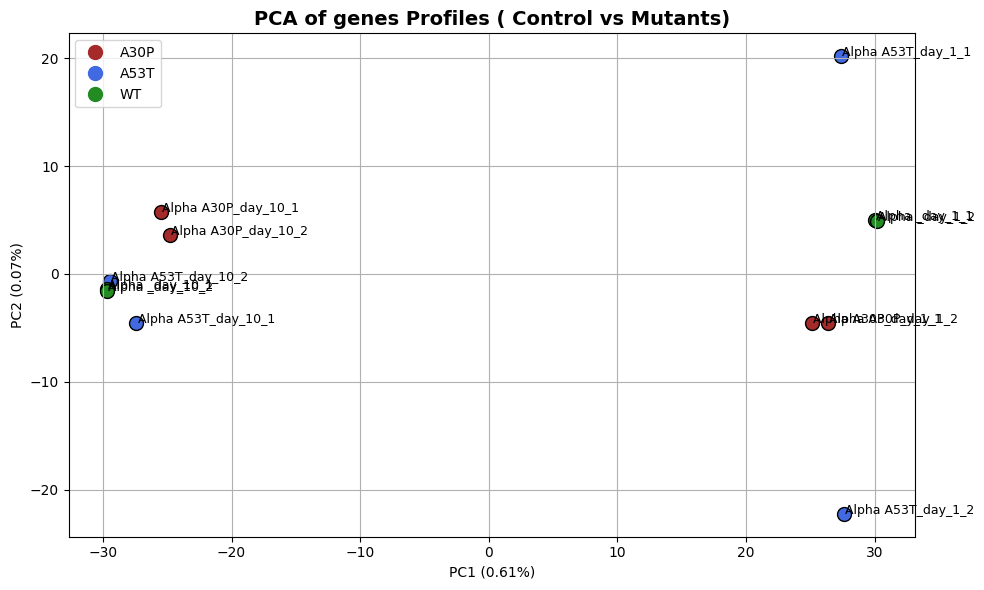

In [ ]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles ( Control vs Mutants)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()